### Irshandy Aditya Wicaksana - TI 3A / 16 - 2241720148
### Tugas 1: Multiple Linear Regression

In [38]:
# import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder

# baca data dari file CSV
data = pd.read_csv('data/insurance.csv')

# melihat data awal
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [27]:
# identifikasi variabel
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [28]:
# Membuat objek LabelEncoder: LabelEncoder digunakan untuk mengubah data kategori menjadi data numerik. kategori adalah daftar kolom yang perlu diubah.
le = LabelEncoder()  # Membuat objek LabelEncoder
kategori = ['sex', 'smoker', 'region']

# Proses encoding: Mengubah nilai kategorikal menjadi numerik untuk kolom sex, smoker, dan region menggunakan LabelEncoder.
for kolom in kategori:
    data[kolom] = le.fit_transform(data[kolom])

# Melihat data setelah encoding: Menampilkan lima baris pertama dari dataset setelah kolom kategori diubah menjadi numerik.
print("\nData setelah encoding: ")
print(data.head())


Data setelah encoding: 
   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [29]:
# Membuat variabel bebas X dan target Y
X = data[['smoker', 'age', 'bmi']]  # Pilihan fitur independen
y = data[['charges']]  # Target yang ingin diprediksi

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data yang telah dipisah
print("Ukuran data latih (X_train):", X_train.shape)
print("Ukuran data uji (X_test):", X_test.shape)
print("Ukuran target latih (y_train):", y_train.shape)
print("Ukuran target uji (y_test):", y_test.shape)

Ukuran data latih (X_train): (1070, 3)
Ukuran data uji (X_test): (268, 3)
Ukuran target latih (y_train): (1070, 1)
Ukuran target uji (y_test): (268, 1)


3. Lakukan feature scaling jika diperlukan.

In [30]:
# Membuat variabel bebas X dan target Y
X = data[['smoker', 'age', 'bmi']]  # Fitur independen

# Melakukan feature scaling pada fitur numerik ('age', 'bmi'), tapi tidak pada 'smoker'
scaler = StandardScaler()

# Scaling hanya pada kolom 'age' dan 'bmi'
X.loc[:, ['age', 'bmi']] = scaler.fit_transform(X[['age', 'bmi']])

# Mengonversi kembali ke DataFrame untuk menjaga nama kolom
X = pd.DataFrame(X, columns=['smoker', 'age', 'bmi'])

# Menampilkan contoh hasil scaling
print("Data setelah scaling:")
print(X.head())

Data setelah scaling:
   smoker       age       bmi
0       1 -1.438764 -0.453320
1       0 -1.509965  0.509621
2       0 -0.797954  0.383307
3       0 -0.441948 -1.305531
4       0 -0.513149 -0.292556


4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [31]:
# Membuat model regresi linier
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [32]:
# Membuat variabel bebas X dan target Y
X = data[['age', 'bmi', 'children']]  # Asumsi hanya menggunakan fitur numerik
y = data[['charges']]

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model
model = LinearRegression()  # Definisi model di sini
model.fit(X_train, y_train)  # Melatih model

# Membuat prediksi
y_pred = model.predict(X_test)  # Prediksi pada data uji

# Menampilkan beberapa hasil prediksi
print("hasil prediksi:", y_pred[:5])

hasil prediksi: [[13305.28945949]
 [11801.95170145]
 [16941.71437111]
 [14278.42206855]
 [ 8680.25439362]]


6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [33]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 9181.311632897383
MSE: 131201335.64669806
RMSE: 11454.315153980095
R-squared: 0.15489592484270753


## Visualisasi Data

e:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


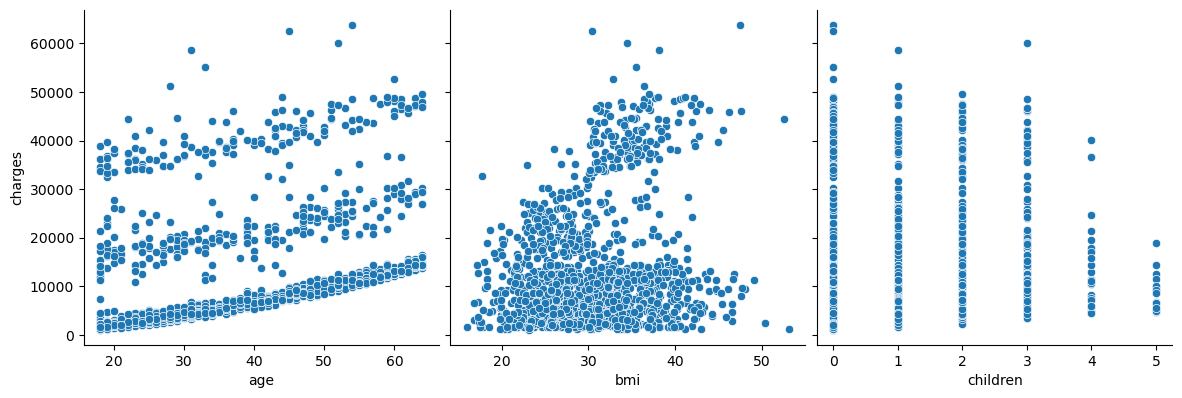

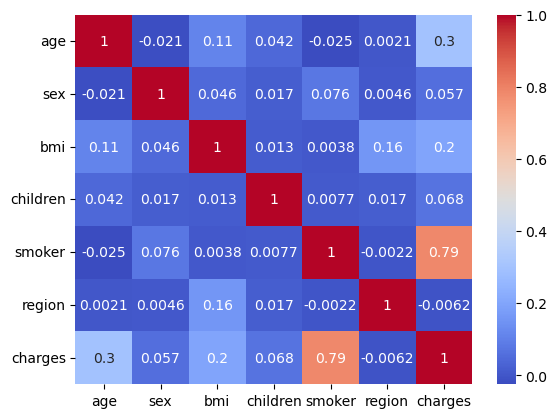

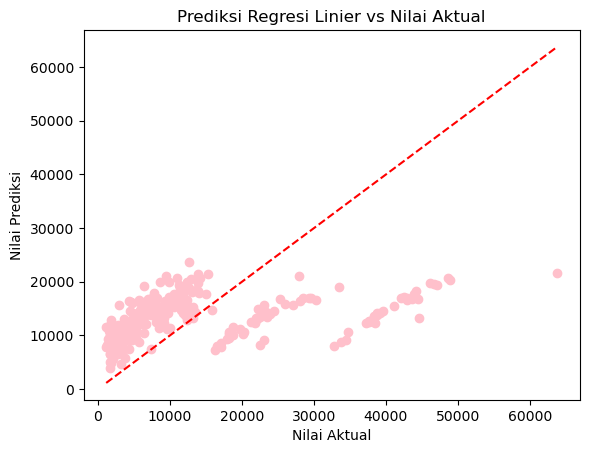

In [37]:
# Visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['age', 'bmi', 'children'],
             y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

# Visualisasi korelasi dengan heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Scatter plot untuk Regresi Linier
plt.scatter(y_test, y_pred, color='pink')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Prediksi Regresi Linier vs Nilai Aktual')
plt.show()